{'run_metadata': [], 'audio': [], 'tensors': [], 'scalars': ['loss', 'regression_acc', 'val_regression_loss', 'val_classification_loss', 'mAP', 'regression_loss', 'val_classification_acc', 'val_loss', 'classification_loss', 'classification_acc', 'val_regression_acc'], 'histograms': [], 'images': [], 'graph': True, 'distributions': [], 'meta_graph': True}
[ScalarEvent(wall_time=1526912038.775655, step=0, value=0.0023123505525290966), ScalarEvent(wall_time=1526912326.7940202, step=1, value=0.013334118761122227)]


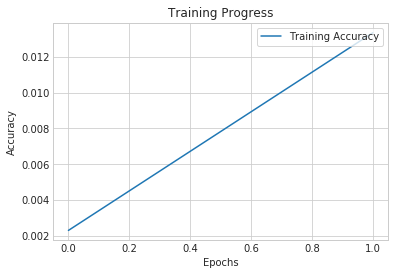

In [44]:
import os
#Modified from https://gist.github.com/tomrunia/1e1d383fb21841e8f144
import numpy as np
#from tensorflow.python.summary.event_accumulator import EventAccumulator
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

BASE_DIR = os.getcwd()
#LOG_FILE = os.path.join(BASE_DIR, 'logs', 'events.out.tfevents.1526898726.deep-traffic-v2')
LOG_FILE = os.path.join(BASE_DIR, 'logs', 'events.out.tfevents.1526911730.deep-traffic-v2')

# Loading too much data is slow...
tf_size_guidance = {
    'compressedHistograms': 10,
    'images': 0,
    'scalars': 100,
    'histograms': 1
}

event_acc = EventAccumulator(LOG_FILE, tf_size_guidance)
event_acc.Reload()

# Show all tags in the log file
print(event_acc.Tags())

class_acc = event_acc.Scalars('mAP')
#val_class_acc = event_acc.Scalars('val_classification_acc')
#training_accuracies =   event_acc.Scalars('training-accuracy')
#validation_accuracies = event_acc.Scalars('validation_accuracy')

print(class_acc)

steps = len(class_acc)
x = np.arange(steps)
y = np.zeros([steps, 2])

for i in range(steps):
    y[i, 0] = class_acc[i][2]
    #y[i, 1] = val_class_acc[i][2]

plt.plot(x, y[:,0], label='Training Accuracy')
#plt.plot(x, y[:,1], label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Progress")
plt.legend(loc='upper right', frameon=True)
plt.show()